# Causal Discovery : Does the Cockeral Crowing Cause the Sun to Rise?

## 10 Lines of Python code to automate causal discovery that you have got to see! 

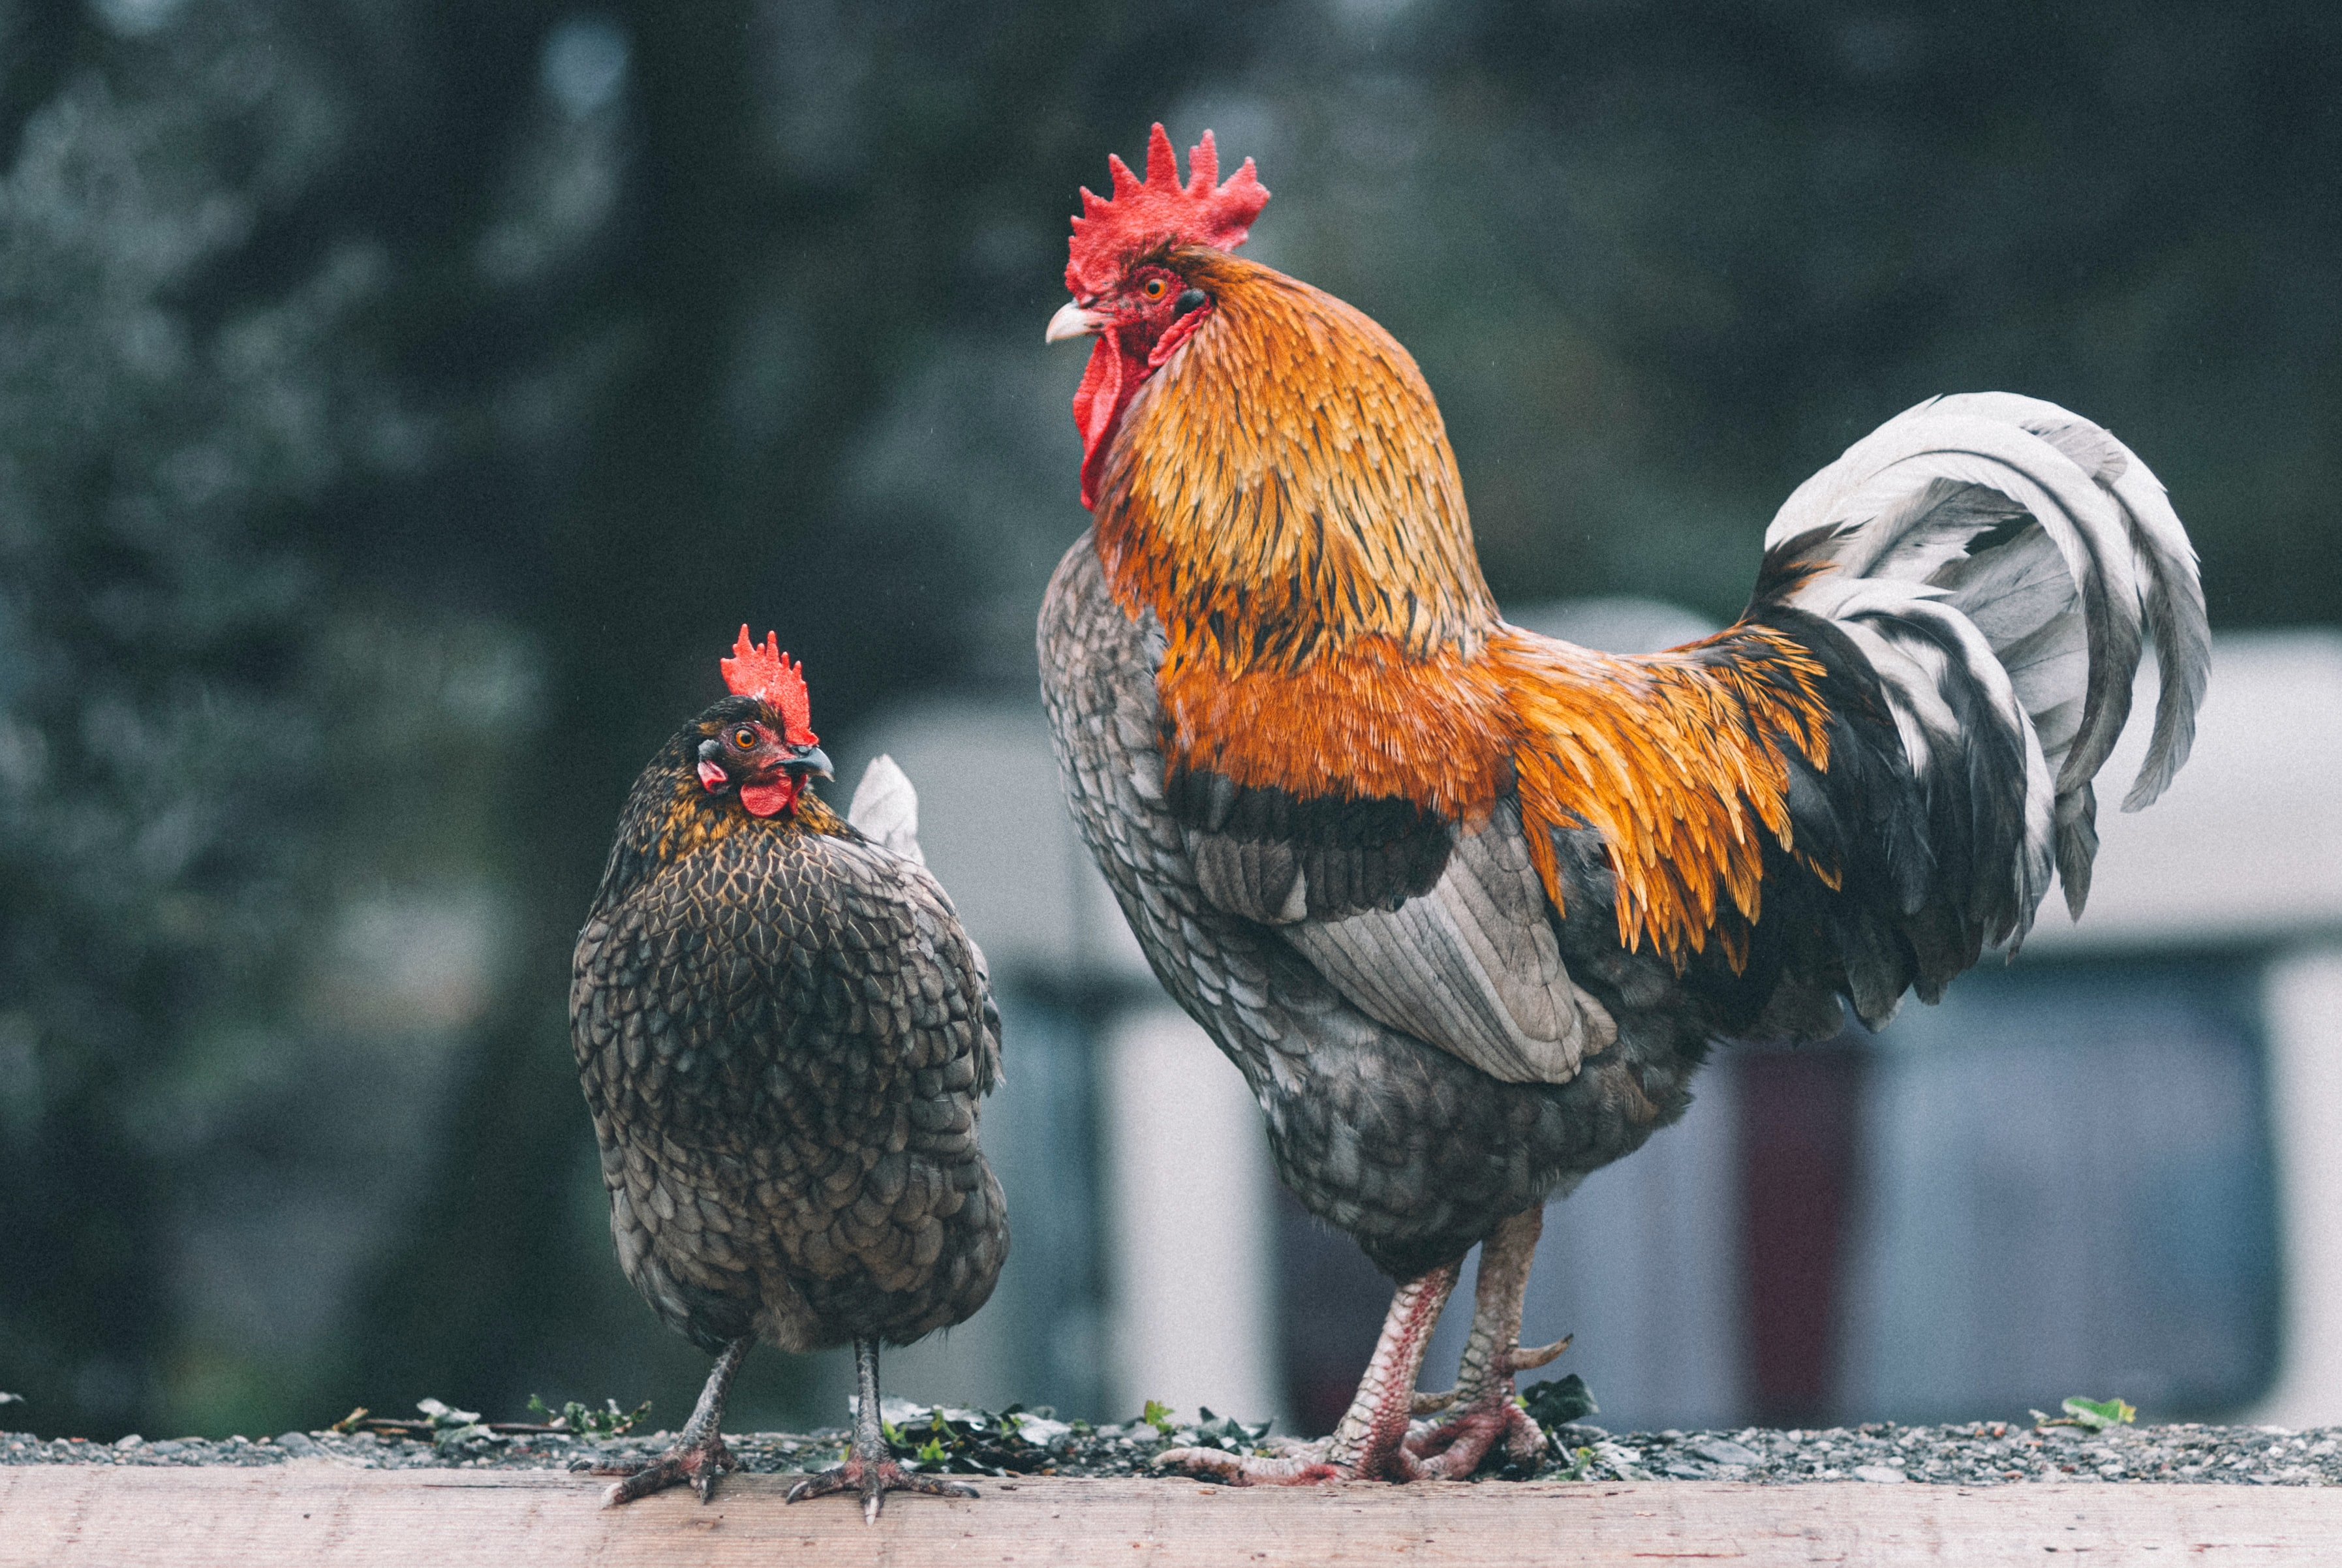

Photo by <a href="https://unsplash.com/@vonshnauzer?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Egor Myznik</a> on <a href="https://unsplash.com/images/animals/chicken?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Introduction

The focus of my recent research has been "causal inference" driven by the increasing requests I get from customers to push and helping them understand what impact their data-driven decisions will have in the real world.

One of the things that intrigued me initially was - "How are causal diagrams constructed?". In many of the online examples of causal inference they seem to spring into life fully formed with no explanation of how the nodes and links were identified.

This led me to read "The Book of Why" by Judea Pearl and Dana Mackenzie (several times!) and the perceived wisdom is that you cannot reverse engineer a causal diagram, also known as a Directed Acyclic Graph (DAG) from the data alone. 

Data can reveal correlations but not causation, so how is it possible for causation to be "discovered"?

Please note that all the data sources in this artice were either created by the author or obtained from sources that grant a public use license.

In [21]:
import pandas as pd
import numpy as np

#import sys
#sys.path.insert(1, r'C:\Users\GHarrison\OneDrive - Lincoln College\Python Projects\Data Science\Utilities')

#from Causal.lib.synthetic_utils import BinaryDataGenerator, SampleBinaryDatasets

In [88]:
#generator = BinaryDataGenerator(population_size=1_000_000, columns=['Sun Rises?', 'Cock Crows?'], random_state=42) 
#generator.set_values_from_lists(col_name="Sun Rises?", value_list = [1, 0], frac_list = [0.95, 0.05])
#generator.set_values(col_name="Cock Crows?", frac=1, condition=generator.data["Sun Rises?"]==0) 
#generator.set_values_from_lists(col_name="Cock Crows?", value_list = [1, 0], frac_list = [0.95, 0.05], condition=generator.data["Sun Rises?"]==1)
#df_sun_cockeral = generator.data

### Can Causality be Established from the Data?

Consider the following binary data set ...

In [90]:
df_sun_cockeral = pd.read_csv("data/sun_cockeral.csv")

print(f"Number of rows: {len(df_sun_cockeral)}")
df_sun_cockeral.groupby(["Sun Rises?"])["Cock Crows?"].value_counts().sort_values(ascending=False)

Number of rows: 1000000


Sun Rises?  Cock Crows?
1           1              902500
0           1               50000
1           0               47500
Name: Cock Crows?, dtype: int64

We can see that the cockeral crows when the sun rises in 90.25% of observations but how do we know if the sun rise causes the cock to crow or the cockeral crowing causes the sun to rise?

The number of instances when the cockeral crows when the sun isn't rising or when the sun rises but the cockeral stays silent are virtually identical so the causal answer cannot be found by comparing the data.

One approach could be to look at the the temporal aspect. If the sun rises consistently before the cockeral crows that will be a good indicator of causality but what if our cockeral is an early riser? 

The answer is surely to consult the domain experts. If we could assemble a team with an astrologer, a physicist and a poultry farmer we could soon work out that the sun is causing the cockeral to crow and not the other way around!

### So What Can the Libraries Do?

Undeterred by suns rising and cockerals crowing I set off in search of something that was out there already that might be able to perform the magic of causal discovery on the data.

There is an algorithm called "NOTEARS" that does purport to be able to implement causal discovery, so let's give it a try and see what it can do ...

In [ ]:
#df_smallpox_data = SampleBinaryDatasets().disease_dataset.data

In [92]:
df_smallpox_data = pd.read_csv("data/smallpox_data.csv")
df_smallpox_data.value_counts().reset_index().rename({0:"Count"}, axis=1)

Vaccination?  Reaction?  Smallpox?  Death?   Count
0             1          0          0       0  980100
1             1          1          0       0    9801
2             0          0          0       0    9800
3             0          0          1       0     160
4             1          1          0       1      99
5             0          0          1       1      40

This dataset is modeling the cause-and-effect relationships in smallpox vaccinations. Let's run the NOTEARS algorithm against it and see what it can do ...

In [10]:
from causalnex.structure.notears import from_pandas

notears_model = from_pandas(df_smallpox_data, w_threshold=0.1)
notears_model.edges

OutEdgeView([('Reaction?', 'Vaccination?'), ('Smallpox?', 'Reaction?'), ('Death?', 'Reaction?'), ('Death?', 'Smallpox?')])

If we were to visualse the results produced by NOTEARS it would look like this ...

<div>
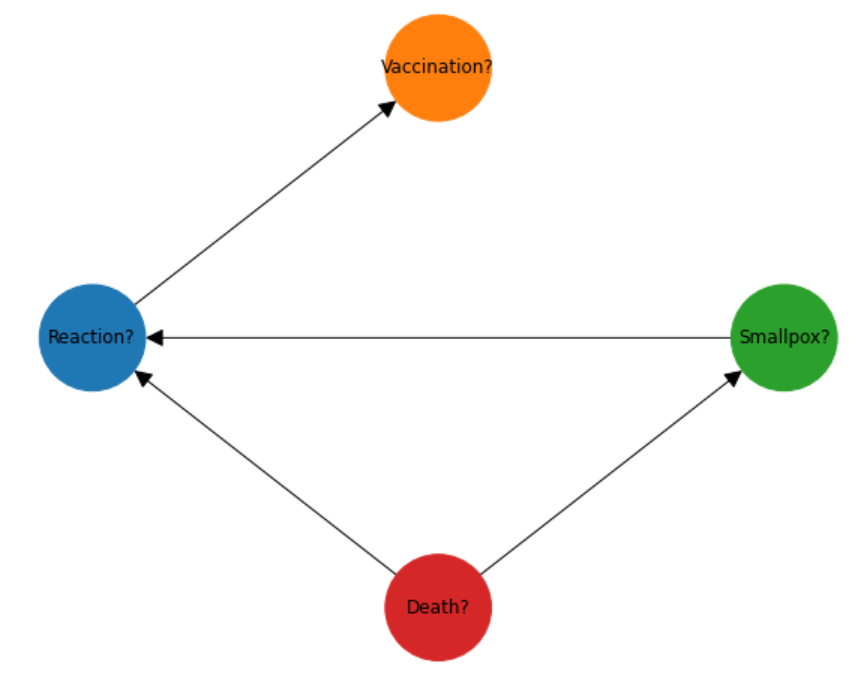
</div>

It doesn't look very good does it? According to NOTEARS "Death" is causing "Smallpox". The temporal aspect tells us that smallpox comes first so it cannot be caused by death. Nor can smallpox cause the reaction (the vaccine causes the reaction) and the reaction certainly cannot cause the vaccination.

Whereas the causality for the smallpox vaccination programme actually looks like this ...

<div>
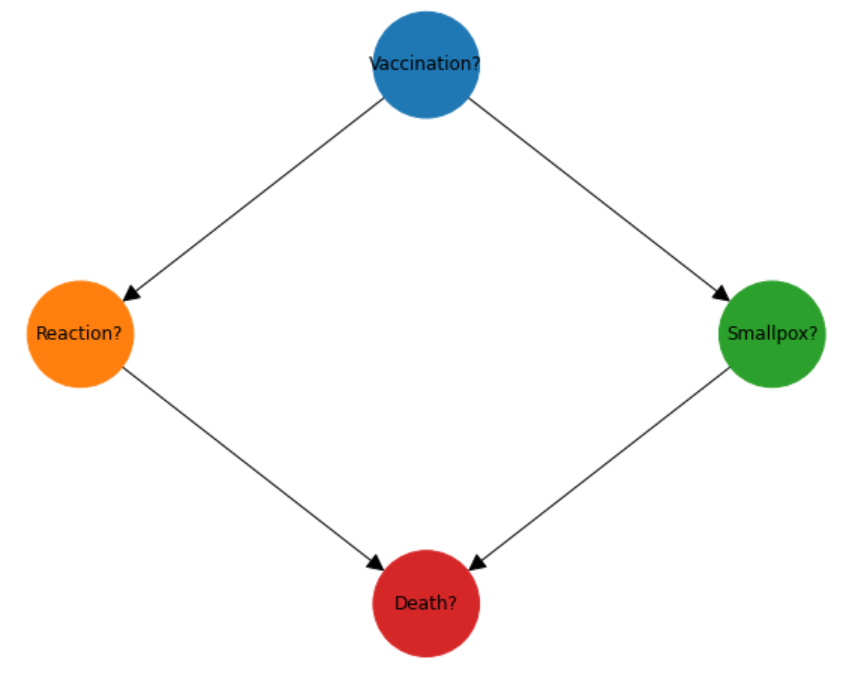
</div>

Using the knowledge of domain experts we can easily establish that the vaccination has a causal effect on whether the patient has a reaction and whether they go on to develop the disease and the reaction and smallpox both have a causal link with death.

So, we have established that even in a very simple causal model the NOTEARS causal discovery algorithm does not produce the results we need. In addition to this a reader of one of my previous articles pointed out that NOTEARS does not work on Python 3.9 and as I am about to upgrade this is a real show-stopper.

If you want to read more about the unsuotability of NOTEARS there is an excellent academic paper on Googls Scholar by Marcus Kaiser and  Maksim Sipos - https://arxiv.org/pdf/2104.05441.pdf.

Before we give up on fully automated causal discovery, let's take a look at an alterative - the "lasso" algorithm -

In [23]:
df_earnings = pd.read_csv("data/graduate_earnings.csv")
df_earnings.head()

age  hours-per-week  hasGraduateDegree  inRelationship  isWhite  isFemale  \
0   39              40                  0               0        1         0   
1   50              13                  0               1        1         0   
2   38              40                  0               0        1         0   
3   53              40                  0               1        0         0   
4   37              40                  1               0        1         1   

   greaterThan50k  
0               0  
1               0  
2               0  
3               0  
4               0

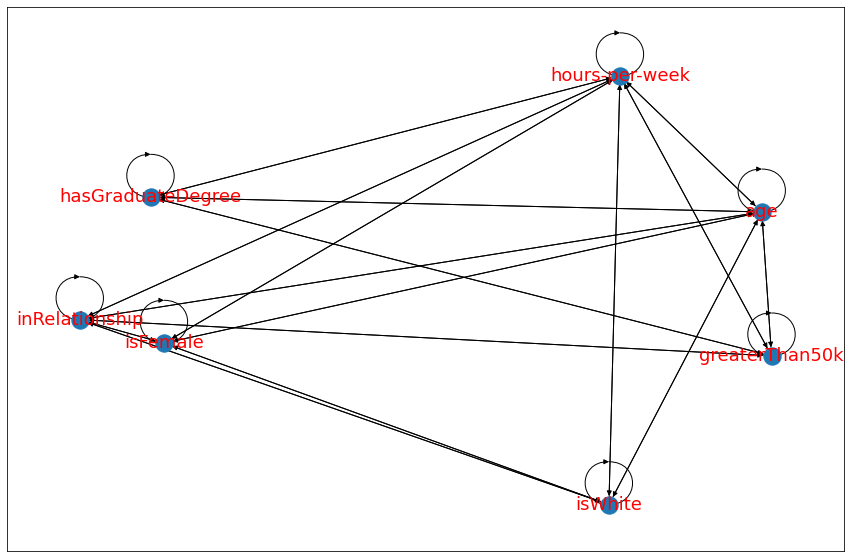

In [29]:
import cdt
import networkx as nx

glasso = cdt.independence.graph.Glasso()
skeleton = glasso.predict(df_earnings)

fig=plt.figure(figsize=(15,10))
nx.draw_networkx(skeleton, font_size=18, font_color='r')

Oh dear, Lasso is a disaster! It has predcted that everything is causing everything else and that the nodes cause themselves as well!

My final attempts were to try the GES, GIES and LINGAM algorithms but these all require R libraries. I do not use R and even if I did manage to get the configuration right I would never be able to create portable code that other data scientists could use.

THe causal discovery libraries and algorithms that are available do not work and that is not surprising as causality cannot be established from the data.

This conclusion led to me developing my own approach ...

### The Solution ...

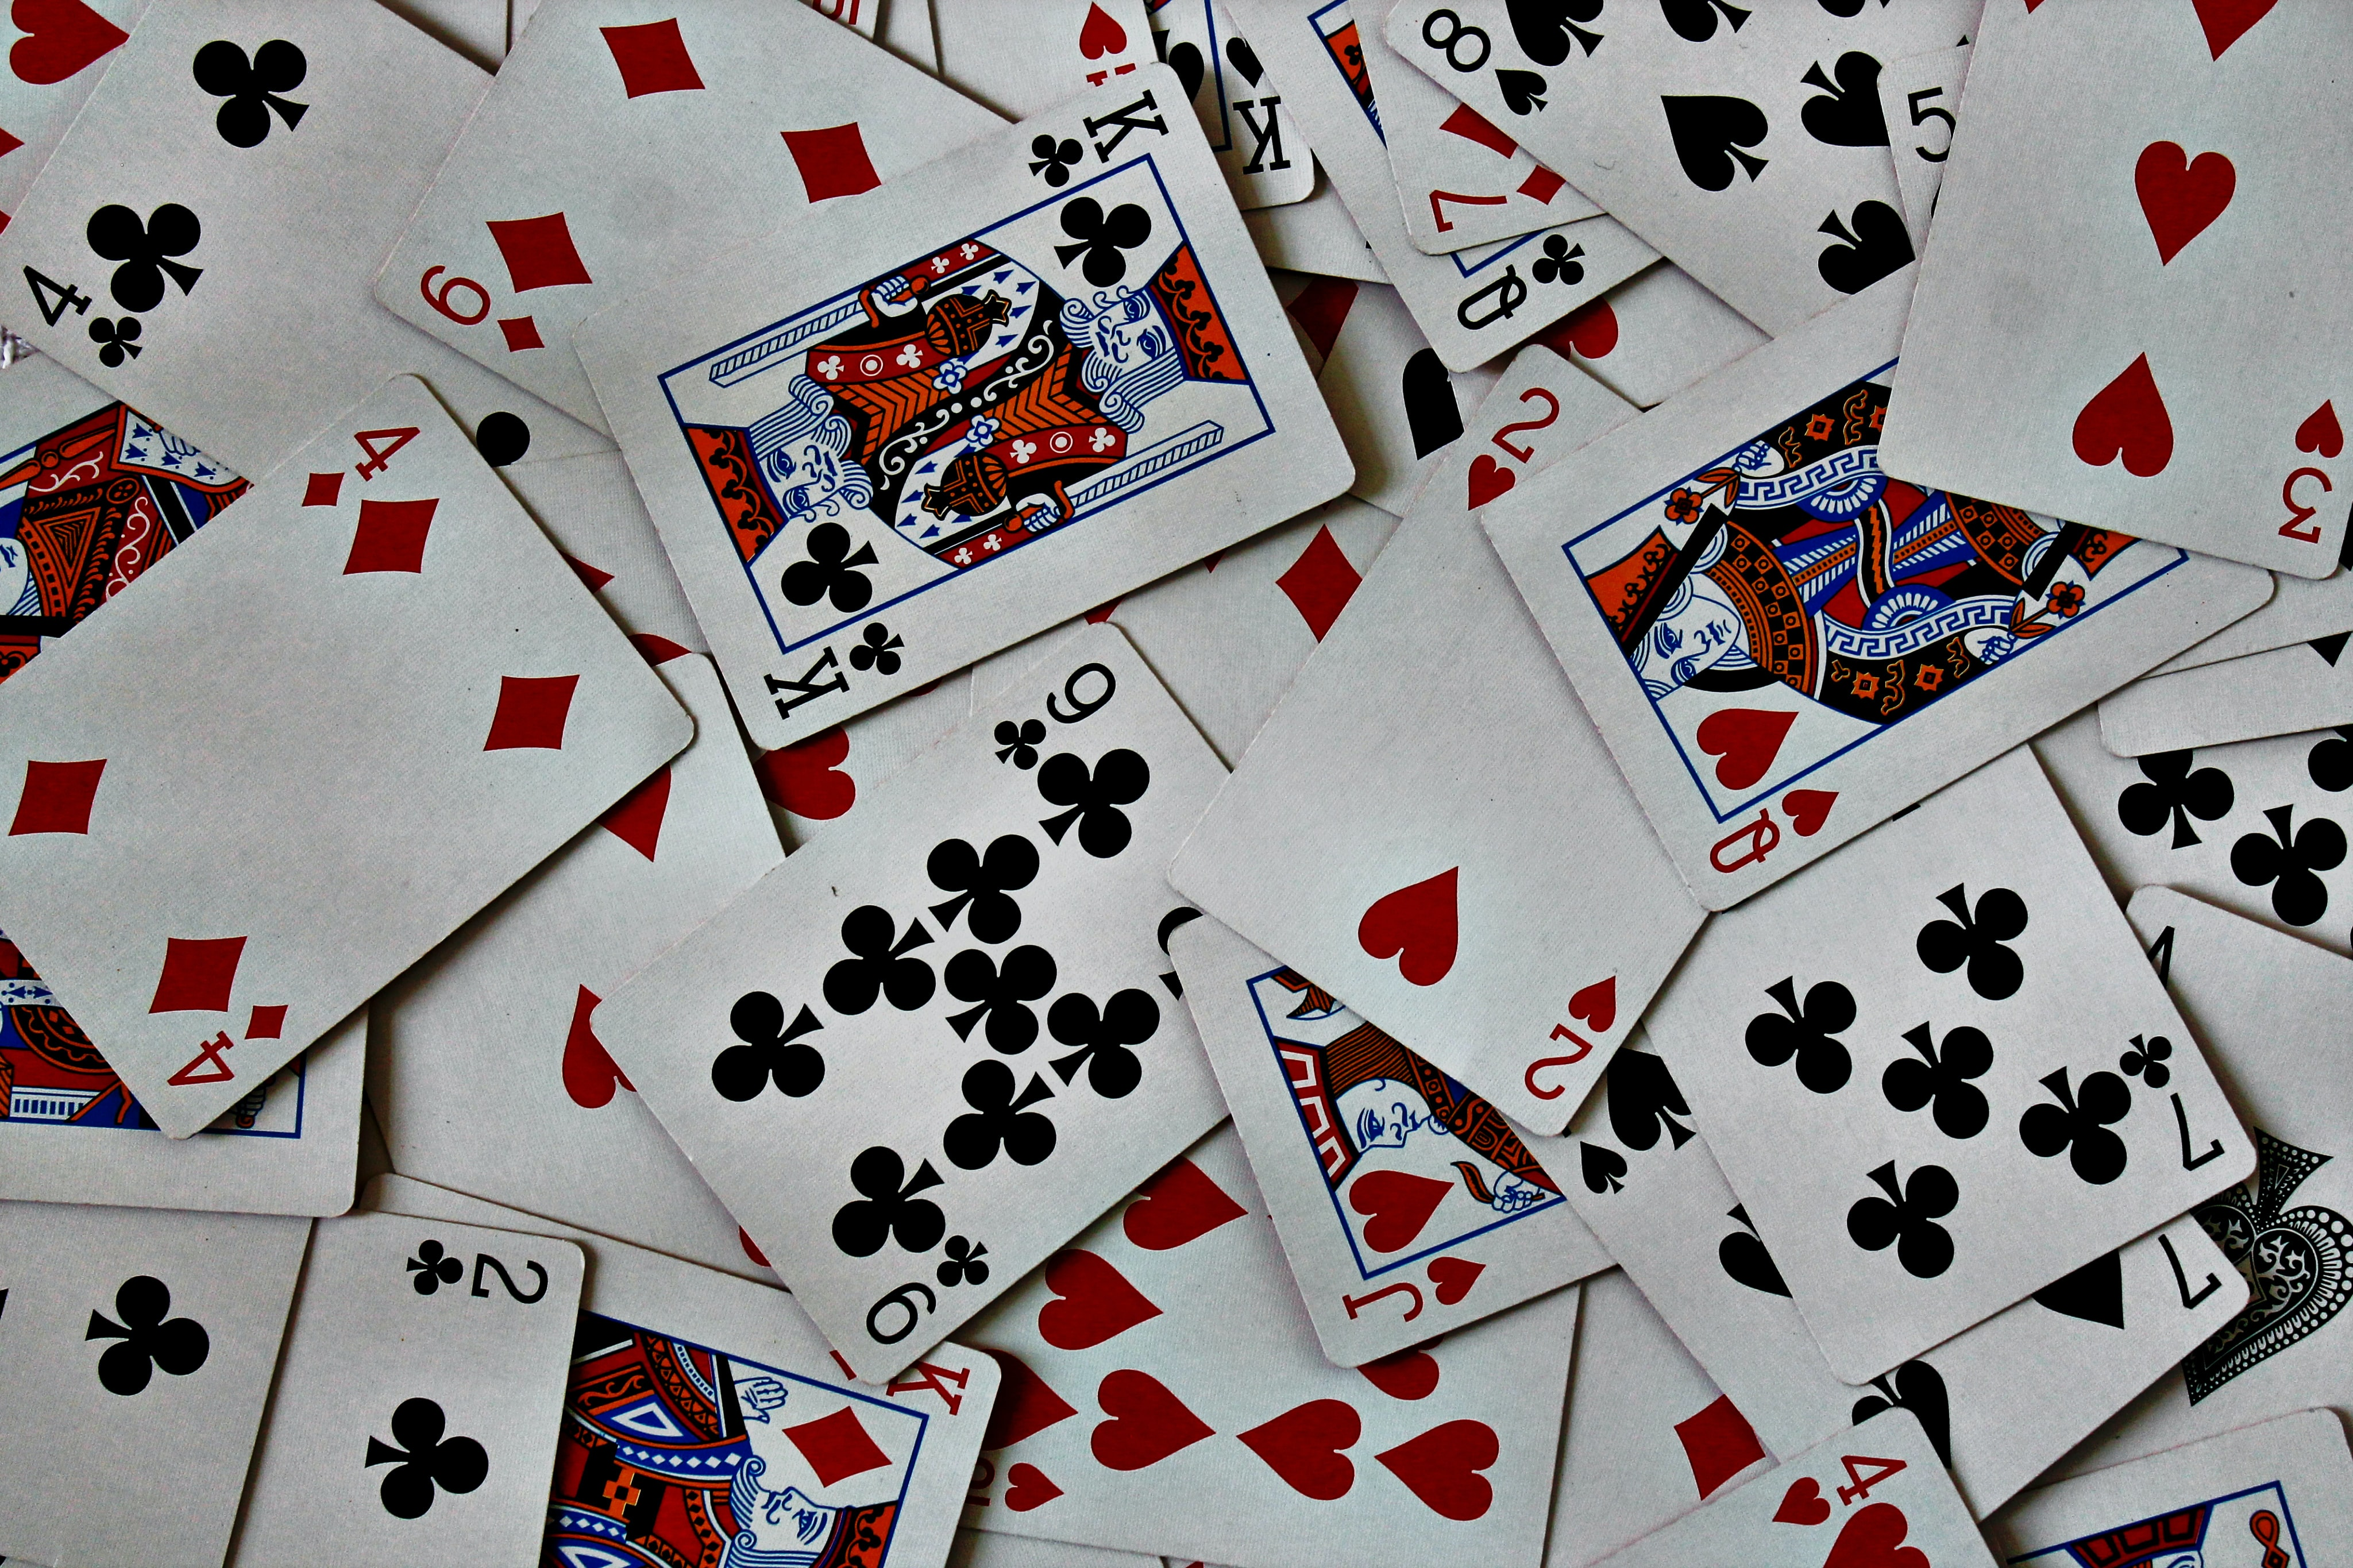

Photo by <a href="https://unsplash.com/@amandagraphc?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Amanda Jones</a> on <a href="https://unsplash.com/s/photos/card-game?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

Cards on the table, I have not written a causal discovery algorithm. Rather my algorithm implements correlative discovery with a twist (no pun intended!).

When I had given up on the causal discovery libraries I still needed a way to visualise the correlation and causation as a starting point for the conversation with the domain experts. 

I reasoned that I could calculate the correlations between the features / nodes easily and that this would at least be a starting point.

I developed my thinking as follows - in causal discovery models we usually identify the "effect" we are interested in. In the smallpox example this is "Death?", and in the graduate earnings example the effect is [earnings] "greaterThank50k". 

Therefore if there are correlations between any feature and the "effect" the causal direction must be from the other features to the effect.

My next step was to develop a recursive algorithm that works as follows - 

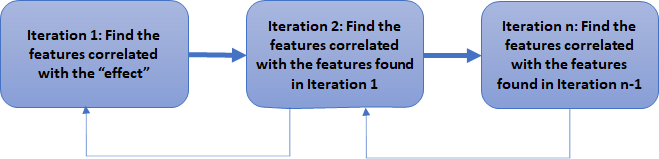

Duplicates must be excluded and also bi-directional links must be excluded. I also wanted to be able to explicitly include or exclude connections (edges) and to explictly exclude features (nodes).

This is what I came up with ...

In [69]:
def discover(data : pd.DataFrame, root_nodes : list, predefined_edges : list, excluded_edges : list, excluded_nodes : list, threshold : float = 0.1, iterations : int = 3) -> list: #pylint: disable="dangerous-default-value"
    if iterations == 0:
        return [(node, root_node) for (node, root_node) in predefined_edges if node not in excluded_nodes and root_node not in excluded_nodes]

    # Non-numeric data types must be label encoded so that they can be evaluated using .corr()
    data_encoded = data.copy(deep=True) 
    for col in data_encoded.select_dtypes(exclude=[np.number]):
        data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])

    for root_node in root_nodes:
        ds_correlated_nodes = data_encoded.corr()[root_node].abs().sort_values(ascending=False)[1:]
        ds_correlated_nodes = ds_correlated_nodes[ds_correlated_nodes >= threshold]

        predefined_edges.extend([(node, root_node) for node in list(ds_correlated_nodes.index) if (root_node, node) not in predefined_edges and (node, root_node) not in predefined_edges and (node, root_node) not in excluded_edges and (root_node, node) not in excluded_edges])

    return discover(data=data, root_nodes=list(ds_correlated_nodes.index), predefined_edges=predefined_edges, excluded_edges=excluded_edges, excluded_nodes=excluded_nodes, threshold=threshold, iterations=iterations-1)

This is my implementation of correlative discovery that enables causal discovery implemented in just 10 lines of code which uses recursion to add multiple layers of links to the causal graph. 

Let's take a look and see how it performs ...

### The Solution in Action

We are going to need some data and I have selected the hotel bookings cancellation data (which has an open license) by Antonio, Almeida and Nunes, 2019, https://www.sciencedirect.com/science/article/pii/S2352340918315191#f0010

In [32]:
columns = [
        "HotelType", 
        "BookingChanges",
        "AverageDailyRate", 
        "PreviousBookingsNotCanceled",
        "IsRepeatedGuest",
        "ArrivalDateMonth", 
        "LeadTime",
        "DifferentRoomAssigned", 
        "RequiredCarParkingSpaces",
        "TotalOfSpecialRequests",
        "Country",
        "Meal",
        "TotalStay",
        "TotalGuests",
        "DepositType",
        "IsCanceled",
        ]

df_hotel = pd.read_csv("data/hotel_bookings_full.csv").loc[:, columns]

First we need to take a peek at the correlations ...

In [39]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from graphviz import Digraph
from IPython.display import SVG

def plot_full_correlation(df_data : pd.DataFrame, fig_size : tuple = (10, 10), decimal_place : int = 2):
    df_encoded = df_data.copy(deep=True)
    for col in df_encoded.select_dtypes(exclude=[np.number]): # Non-numeric data types must be label encoded so that they can be evaluated using .corr()
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

    plt.figure(figsize=fig_size)
    mask = np.triu(np.ones_like(df_encoded.corr(), dtype=bool))
    sns.heatmap(round(df_encoded.corr().abs(), decimal_place), annot=True, cmap='Reds', mask=mask)
    plt.show()
    
def display_digraph(edges : list):
    digraph = Digraph()
    digraph.edges(edges)
    digraph.render("digraph", format="svg")
    display(SVG("digraph.svg"))    

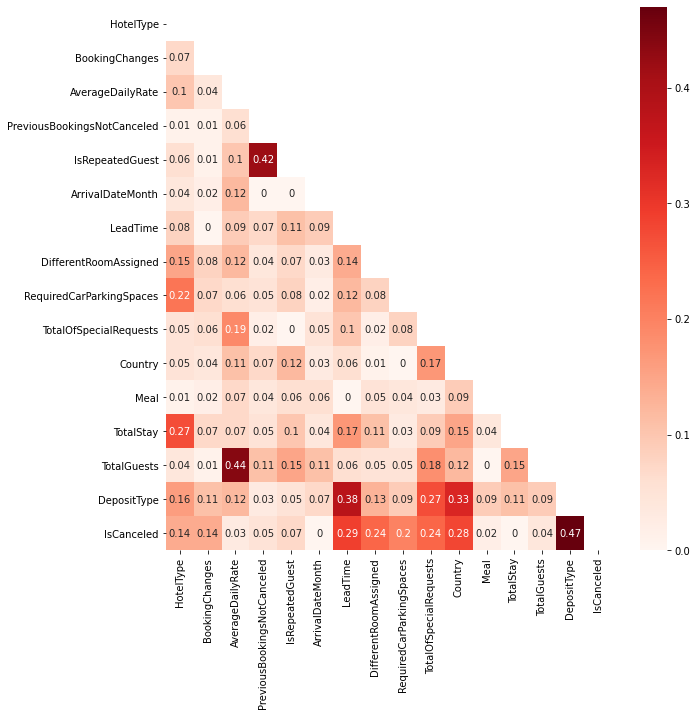

In [64]:
plot_full_correlation(df_hotel)

The fist run involves keeping the iterations down to 1 so we are just looking at the correlations (which should be causal) with the "effect" i.e. whether the hotel booking is cancelled or not. Here goes ...

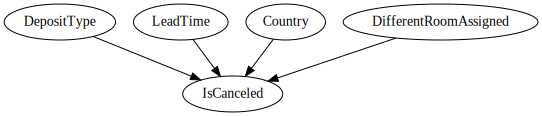

In [70]:
edges = discover(data=df_hotel, 
                 root_nodes=["IsCanceled"], 
                 predefined_edges=[], 
                 excluded_edges=[], 
                 excluded_nodes=[], 
                 threshold=0.24, 
                 iterations=1)

display_digraph(edges)

OK, that's not a bad start, let's increase the number of iterations / recursions / layers to 3, tweak the correlation threshold a bit and see what we get ...

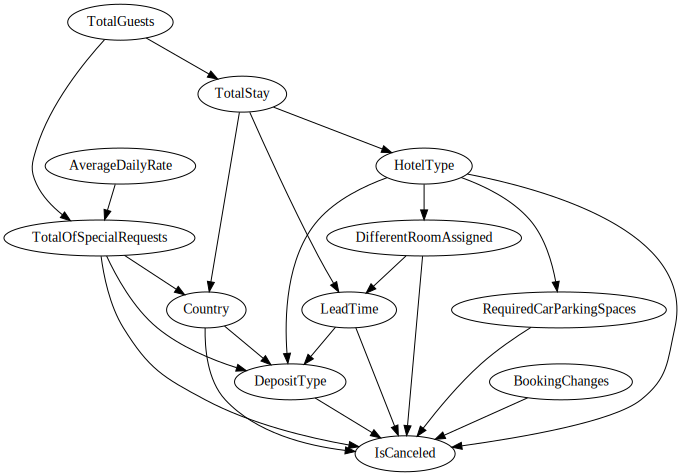

In [77]:
edges = discover(data=df_hotel, 
                 root_nodes=["IsCanceled"], 
                 predefined_edges=[], 
                 excluded_edges=[], 
                 excluded_nodes=[], 
                 threshold=0.135, 
                 iterations=3)

display_digraph(edges)

OK, not too bad, but it is a bit "busy" so the next step is to exclude some of the nodes we suspect might be causing some of the noise (note: in reality we would be talking to our domain experts at this stage).

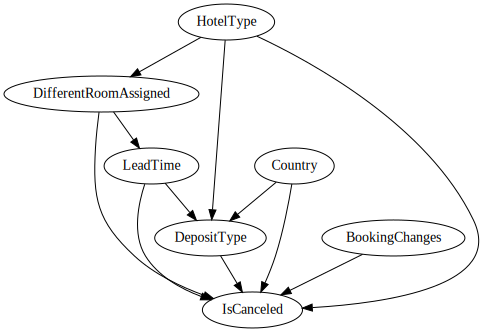

In [79]:
excluded_nodes = ["TotalOfSpecialRequests", "RequiredCarParkingSpaces", "TotalStay"]

edges = discover(data=df_hotel, 
                 root_nodes=["IsCanceled"], 
                 predefined_edges=[], 
                 excluded_edges=[], 
                 excluded_nodes=excluded_nodes, 
                 threshold=0.135, 
                 iterations=3)

display_digraph(edges)

This is starting to look much better! Remember that the my algorithm is comfortable that links to "IsCancelled" are causal because it is the "effect" i.e. it is at the end of the line so a correlation is assumed to be causal.

The other layers of the tree are just correlative though, the direction of the arrows were added based on the order that the algorithm found them in.

Working with the domain experts (or my own experience of hotel bookings) I notice the following -

- The link from "DifferentRoomAssigned" to "LeadTime is in the wrong direction because a long booking lead time increases the probability that the booking will change and not vice-versa.
- The correlation between "BookingChanges" and "DifferentRoomAssigned" is below the threshold but it may be a significant cause

The next attempt instructs the algorithm to make these corrections -

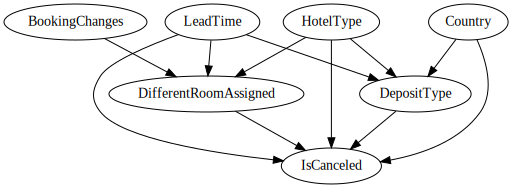

In [81]:
excluded_nodes = ["TotalOfSpecialRequests", "RequiredCarParkingSpaces", "TotalStay"]
corrected_edges = [("LeadTime", "DifferentRoomAssigned"), ("BookingChanges", "DifferentRoomAssigned")]
excluded_edges = [("BookingChanges", "IsCanceled")]

edges = discover(data=df_hotel, 
                 root_nodes=["IsCanceled"], 
                 predefined_edges=corrected_edges, 
                 excluded_edges=excluded_edges, 
                 excluded_nodes=excluded_nodes, 
                 threshold=0.135, 
                 iterations=3)

display_digraph(edges)

An "unobserved confounder" is a factor that we believe is impacting on our causal model but that has not been measured and has not been included as a feature.

My experience of going to hotels and my knowledge of the hotels dataset is starting to make me think that this is what is going on here. 

There are two hotels in the dataset - a "city" hotel and a "resort" hotel. This is leading me to conclude that an unobserved confounder in this causal model is the main reason for the hotel stay. It is looking very much like holiday-makers go to the resort hotel and business people go to the city hotel, that their habits are significantly different and that this unobserved confounder (because we have not captured the reason for the stay) needs to be modeled.

It is an absolute fact that NOTEARS and other similar algorithms cannot account for "unobserved confounders" but the algorithm I have developed can take them into account by having them explicitly included as follows ...

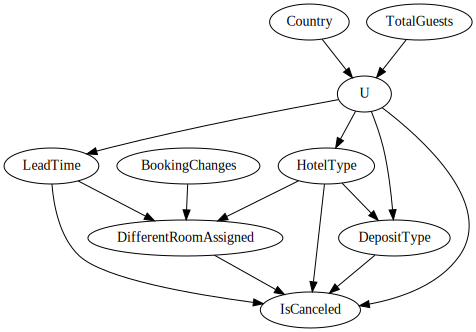

In [86]:
excluded_nodes = ["TotalOfSpecialRequests", "RequiredCarParkingSpaces", "TotalStay"]
corrected_edges = [("LeadTime", "DifferentRoomAssigned"), ("BookingChanges", "DifferentRoomAssigned")]
excluded_edges = [("BookingChanges", "IsCanceled"), ("LeadTime", "DepositType"), ("Country", "IsCanceled"), ("Country", "DepositType")]
unobserved_confounders = [("U", "HotelType"), ("U", "LeadTime"), ("U", "TotalStay"), ("U", "IsCanceled"), ("U", "DepositType"), ("Country", "U"), ("TotalGuests", "U")]

edges = discover(data=df_hotel, 
                 root_nodes=["IsCanceled"], 
                 predefined_edges=corrected_edges + unobserved_confounders, 
                 excluded_edges=excluded_edges, 
                 excluded_nodes=excluded_nodes, 
                 threshold=0.135, 
                 iterations=3)

display_digraph(edges)

I am really liking the look of this! My final version of the causal model caputures the following conclusions ...

- There is an "unobserved confounder" which is the primary reason for the stay (holiday vs. business / city break).
- The "Country" has a causal affect on the unobserved confounder - those travelling from some countries are more likely to be on holiday.
- The same for "TotalGuests". Large parties are more likely to be holidaying an singles to be on business.
- This unobserved "reason" has a causal affect in "LeadTime", "HotelType" and "DepositType".
- "LeadTime", "DifferentRoomAssigned", "HotelType", "DepositType" and "Reason" (U) all have a causal affect on "IsCanceled"

### Conclusion

"Causal Discovery" is the process of going beyond correlative links to understand causal links. This is not possible, or at least prohibitively difficult, to automate with algorithms like NOTEARS because the answers do not exist in the data alone.

However, there is still a critical need to visualise causation so that it can be explored with domain experts in order to build a causal diagram, also refered to as a Directed Acyclic Graph (DAG), which is a critical component of causal models.

The existing librarires are inadequate. They do not produce plausable results and do not account for unobserved confounders.

In this article an algorithm based on correlative discovery has been proposed using just 10 lines of code that can be used in an iterative fashion with domain experts to repeatedly refine the sensitivity (threshold), and explicit edges and nodes to build an agreed, plausable causal diagram.

In future articles this causal diagram will be used to build a full blown causal machine learning model that can be used to answer "what-if" questions from customers and business leaders.